<a href="https://colab.research.google.com/github/javadevelopr865/Colab-Notebooks/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.2 MB/s 
     |████████████████████████████████| 189 kB 51.1 MB/s 
     |████████████████████████████████| 1.2 MB 32.2 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 51 kB 302 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key=os.environ.get('AZURE_SEARCH_KEY', 'ff9e8c98a1124aa5a1528ffcaef534d1')

In [8]:
search_images_bing

<function fastbook.search_images_bing>

In [9]:
results = search_images_bing(key,'grizzly bear')
imgs = results.attrgot('contentUrl')
len(imgs)

150

In [44]:
doc(results.attrgot)

In [10]:
dest = 'images/grizzly.jpg'
download_url(imgs[27],dest)

Path('images/grizzly.jpg')

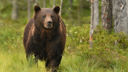

In [11]:
img = Image.open(dest)
img.to_thumb(128,128)

In [4]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')
path

Path('bears')

In [5]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} bear')
    download_images(dest,urls=results.attrgot('contentUrl'))

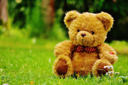

In [27]:
img=Image.open(path/'teddy'/'00000038.jpg' )
img.to_thumb(128,128)

In [6]:
fns=get_image_files(path)
fns

(#433) [Path('bears/grizzly/00000110.jpg'),Path('bears/grizzly/00000143.jpg'),Path('bears/grizzly/00000119.jpg'),Path('bears/grizzly/00000091.jpg'),Path('bears/grizzly/00000046.jpg'),Path('bears/grizzly/00000033.jpg'),Path('bears/grizzly/00000012.jpg'),Path('bears/grizzly/00000087.jpg'),Path('bears/grizzly/00000148.jpg'),Path('bears/grizzly/00000016.jpg')...]

In [7]:
failed=verify_images(fns)
failed

(#5) [Path('bears/teddy/00000091.jpg'),Path('bears/teddy/00000093.jpg'),Path('bears/teddy/00000057.jpg'),Path('bears/teddy/00000068.jpg'),Path('bears/black/00000102.png')]

In [8]:
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

In [9]:
bears = DataBlock(
    blocks =(ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [39]:
dls = bears.dataloaders(path)

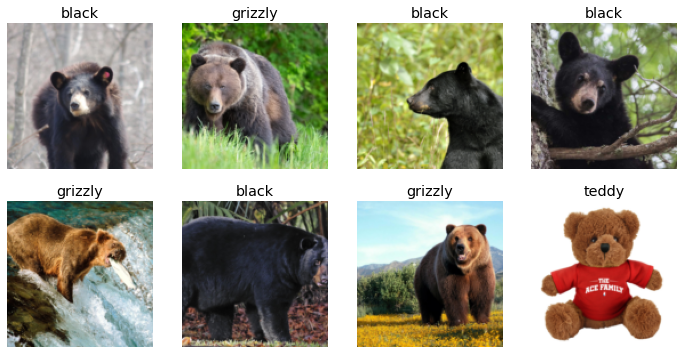

In [42]:
dls.valid.show_batch(max_n=8, nrows=2)

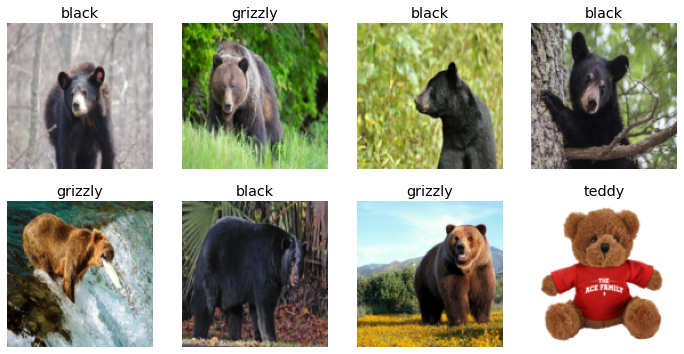

In [45]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

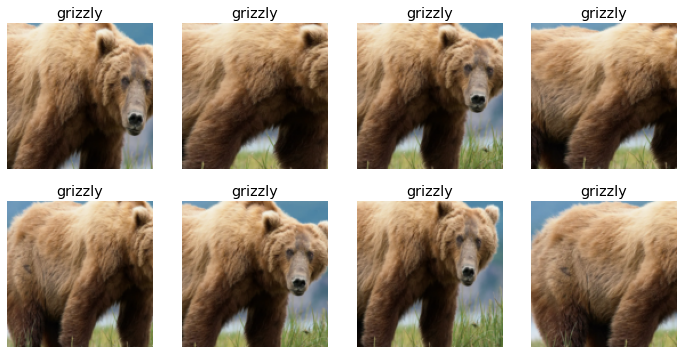

In [46]:
bears = bears.new(item_tfms=RandomResizedCrop(128,min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Data Augmentation

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


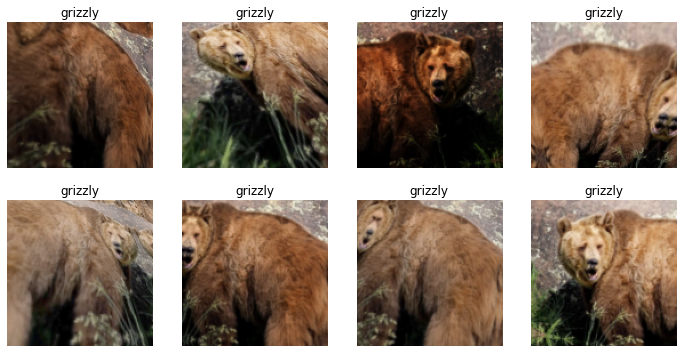

In [10]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Training

In [11]:
!ls -l bears/teddy |wc -l

144


In [12]:
bears = bears.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                  batch_tfms = aug_transforms())
dls = bears.dataloaders(path)

In [13]:
learn=cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.534557,0.347217,0.105882,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.417234,0.233966,0.082353,00:21
1,0.316663,0.200464,0.035294,00:21
2,0.263077,0.190086,0.035294,00:21
3,0.224001,0.173715,0.035294,00:22


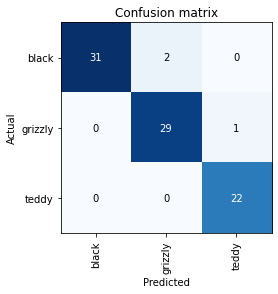

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

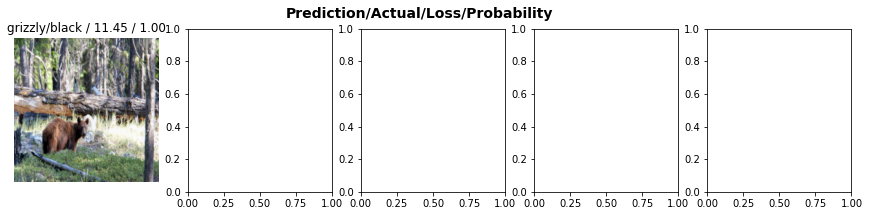

In [15]:
interp.plot_top_losses(5, nrows=1)

In [28]:
for idx in cleaner.delete():
  #print(idx)
  cleaner.fns[idx].unlink()

In [26]:
try:
  for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
except Exception as e:
  print(e)

Destination path 'bears/teddy/00000129.jpg' already exists


In [29]:
bears = bears.new(item_tfms=RandomResizedCrop(224,min_scale=0.5),
                  batch_tfms = aug_transforms())
dls = bears.dataloaders(path)

In [30]:
learn=cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.358794,0.244862,0.061728,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.335984,0.124550,0.061728,00:19
1,0.257263,0.100884,0.037037,00:20
2,0.206874,0.115599,0.037037,00:19
3,0.178237,0.122071,0.037037,00:19


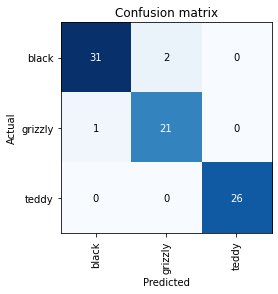

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Exporting Model

In [32]:
learn.export()

In [33]:
path=Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [34]:
learn_inf = load_learner(path/'export.pkl')

In [36]:
img= ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [37]:
dest = 'images/grizzly.jpg'
download_url(img[0], dest)

Path('images/grizzly.jpg')

In [38]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([3.6752e-04, 9.9963e-01, 7.0449e-06]))

In [39]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [40]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [41]:
img= PILImage.create(btn_upload.data[-1])

In [43]:
out_pl=widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))


In [44]:
pred,pred_idx,probs = learn_inf.predict(img)

In [45]:
lbl_pred=widgets.Label()
lbl_pred.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.02f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 0.85')

In [46]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [48]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: 
    display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value=f'Prediction: {pred}; Probability: {probs[pred_idx]:.02f}'

btn_run.on_click(on_click_classify)



In [49]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])